# UCPD Chief Data Project
Data obtained with all cases where force was used from 1/2/2004 to 12/28/2010. Kenneth Rainey was sworn in as police chief of Fairfield, CA from April 2007 to September 2009.
Things we're interested in:
1. Total uses of force over time while Kenneth Rainey was chief - was there an uptick? (start in 2005)
2. Total uses of force over time where suspects were injured
3. Total uses of force over time where a taser or gun was used

In [200]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
#import seaborn

In [216]:
data = pd.read_csv('records_05_10_cleaned.csv', engine='python')
data.rename(columns={'SNspect INjNred':'Suspect Injured'}, inplace=True)
data.rename(columns={'Unnamed: 11':'Proper Procedure'}, inplace=True)

In [217]:
data.head()

,Date,Baton,Gun,Hands,K9,OC,Taser,Sage,Suspect Injured,Officer Injured
0,1/2/05,N,N,N,N,N,Y,N,Y,N
1,1/10/05,N,Y,N,N,N,N,N,N,N
2,1/16/05,N,N,Y,N,N,N,N,N,N
3,1/17/05,N,N,N,N,N,Y,N,Y,N
4,1/19/05,N,N,Y,N,N,Y,N,Y,N


In [218]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = ''
data['Month'] = data['Date'].dt.month
data['Year'] = ''
data['Year'] = data['Date'].dt.year
#data['Month/Year'] = data['Date'].apply(lambda x: "%d/%d" % (x.month, x.year))
#data['Year/Month'] = data['Date'].apply(lambda x: "%d/%d" % (x.year, x.month))
data = data.set_index('Date')
data = data.replace(['N','Y'],[0,1])

In [220]:
#fix the corner cases
data = data.replace(['N',' N','Y',' Y'],[0,0,1,1])
#data.Taser.unique()

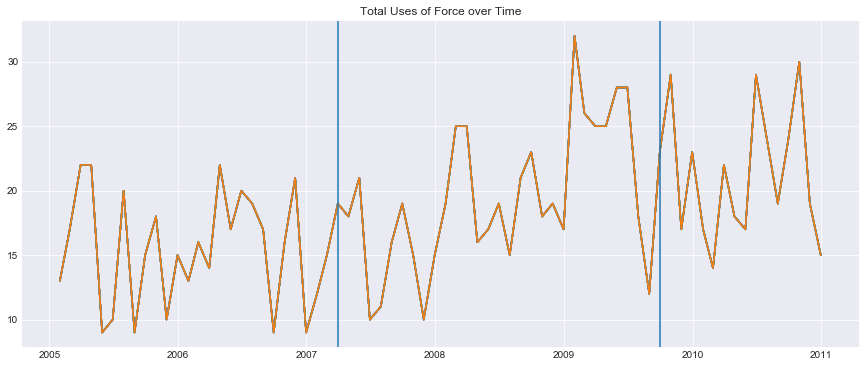

In [229]:
c = data.resample("M").count()
plt.figure(figsize=(15,6))
plt.plot(c)
plt.title('Total Uses of Force over Time')
plt.style.use('seaborn-darkgrid')
plt.axvline(x='2007-03-31')
plt.axvline(x='2009-09-30')
#c.plot(figsize=(10,5), style='--')

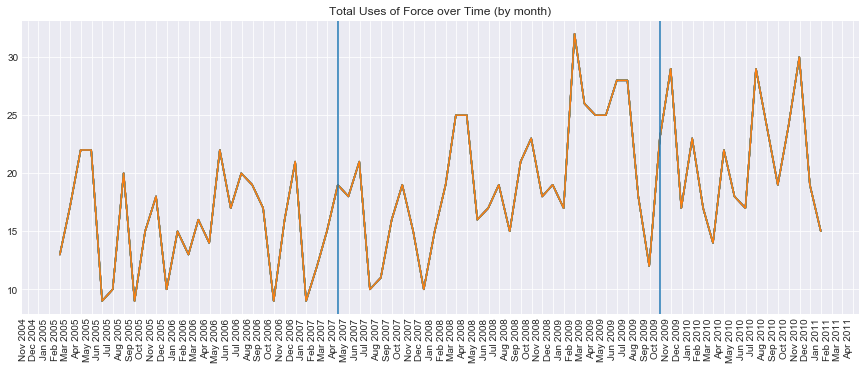

In [228]:
fig, ax = plt.subplots(figsize=(15,6))
plt.plot(data.resample("M").count())
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title('Total Uses of Force over Time (by month)')
plt.axvline(x='2007-03-31')
plt.axvline(x='2009-09-30')
fig.autofmt_xdate()
_ = plt.xticks(rotation=90)

Text(0.5,1,'Total Uses of Force over Time (by year)')

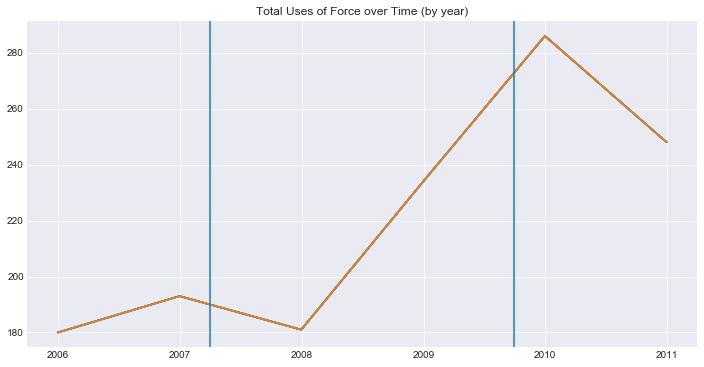

In [230]:
c = data.resample("Y").count()
plt.figure(figsize=(12,6))
plt.plot(c)
plt.axvline(x='2007-03-31')
plt.axvline(x='2009-09-30')
plt.title('Total Uses of Force over Time (by year)')

This is a summary table of the data by year:

In [231]:
data.resample('Y').sum()

,Baton,Gun,Hands,Taser,Sage,Suspect Injured,Officer Injured,Day,Month,Year
Date,,,,,,,,,,
2005-12-31,16,2,137,71,6,78,25,2674,1123,360900
2006-12-31,18,0,130,75,11,89,41,2881,1229,387158
2007-12-31,15,1,90,56,13,93,21,2913,1152,363267
2008-12-31,9,1,170,82,2,99,28,3819,1480,469872
2009-12-31,9,0,161,72,20,125,16,4555,1749,574574
2010-12-31,18,0,84,18,26,90,14,4035,1667,498480


In [232]:
yearly_summary = pd.DataFrame()
yearly_summary['Gun'] = data['Gun'].resample('Y').sum()
yearly_summary['Taser'] = data['Taser'].resample('Y').sum()
yearly_summary['Officer Injured'] = data['Officer Injured'].resample('Y').sum()
yearly_summary['Suspect Injured'] = data['Suspect Injured'].resample('Y').sum()
#yearly_summary.head()

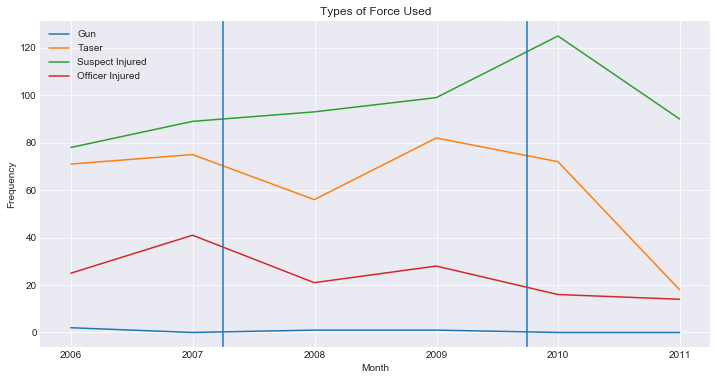

In [233]:
plt.figure(figsize=(12,6))
plt.plot(yearly_summary['Gun'], label='Gun')
plt.plot(yearly_summary['Taser'], label='Taser')
plt.plot(yearly_summary['Suspect Injured'], label='Suspect Injured')
plt.plot(yearly_summary['Officer Injured'], label='Officer Injured')
#plt.plot(data.resample('Y').count(), label='Total')
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.autofmt_xdate()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Types of Force Used')
plt.axvline(x='2007-03-31')
plt.axvline(x='2009-09-30')
#fix x ticks to reflect months
plt.legend(loc='best')

This is a summary print out of the total number of force incidents by year, and broken down by month:

In [71]:
data.groupby(['Year','Month']).size()

Year  Month
2005  1        13
      2        17
      3        22
      4        22
      5         9
      6        10
      7        20
      8         9
      9        15
      10       18
      11       10
      12       15
2006  1        13
      2        16
      3        14
      4        22
      5        17
      6        20
      7        19
      8        17
      9         9
      10       16
      11       21
      12        9
2007  1        12
      2        15
      3        19
      4        18
      5        21
      6        10
               ..
2008  7        15
      8        21
      9        23
      10       18
      11       19
      12       17
2009  1        32
      2        26
      3        25
      4        25
      5        28
      6        28
      7        18
      8        12
      9        23
      10       29
      11       17
      12       23
2010  1        17
      2        14
      3        22
      4        18
      5        17
      6        2

In [234]:
#Export cleaned data to a csv file
data.to_csv('trial_1.csv', sep=',')

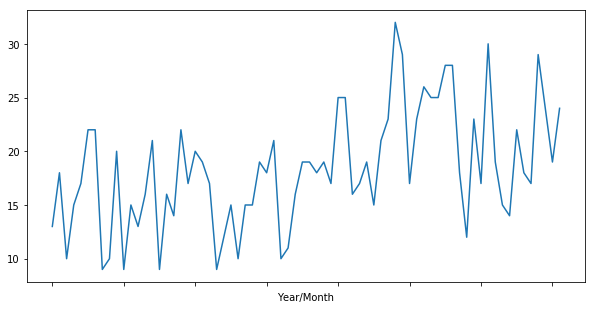

In [85]:
plt = data.groupby(['Year/Month']).size().plot(figsize=(10,5), x='Year')
#g = data.groupby(['Year/Month']).mean()
#ax = g.plot()
#ax.set_xticks(range(len(g)))
#ax.set_xticklabels(["%s-%02d" % item for item in g.index.tolist()], rotation=90)